# Classification and Regression with a Neural Network in Pytorch

Welcome to your first programming assignment! 
In this assignment you will build your first classification and regression neural networks.
This assignment is a 'step-through' guide to implement a simple fully-connected neural network in Pytorch.

* In the first part of this exercise, you will implement a neural network with a 2 dimensional input. Your dataset is based on a two <a href=https://en.wikipedia.org/wiki/Crescent> crescent </a> moon-shaped groups for classification.

* Then, in the second part of this exercise, you will implement a regression model for predicting the output of a two dimensional function.

# Packages
Let's first import all the packages that you will need during this part of assignment.

Feel free to use another libraries if you want to.

In [ ]:
import numpy as np
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from torch import nn
import pandas as pd
import seaborn as sns
from pandas import DataFrame  

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
def print_classification_multi_class_report(y_test,model_predictions):
    from sklearn.metrics import classification_report
    report = classification_report(y_test, model_predictions, output_dict=True)
    display(pd.DataFrame(report).transpose().round(2))

# Dataset

In [ ]:
id_num_str = input("Please Enter your Israeli ID?")
if (len(id_num_str) != 9):
    print('ID should contain 9 digits')
if (id_num_str.isdigit() is False):
    print('ID should contain only digits')
id_num = list(id_num_str[-3:])
random_num = sum(list(map(int, id_num)))
random_num

Please Enter your Israeli ID?200867174


12

In [ ]:
np.random.seed(random_num)
torch.manual_seed(random_num)
x, y = make_moons(500, noise=0.2, random_state = random_num)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=random_num)

**Visualize the dataset using matplotlib:**

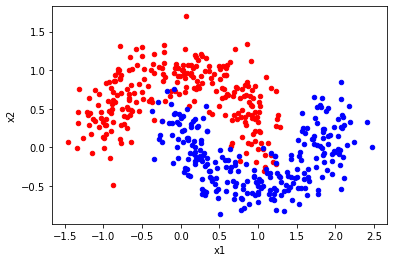

In [ ]:
from matplotlib import pyplot
from pandas import DataFrame
df = DataFrame(dict(x1=x[:,0], x2=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    # group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', color=colors[key])
pyplot.show()


# Simple Logistic Regression

What you are required to do:

1. Implement a 2-class classification neural network with a zero hidden layer.
2. Plot loss vs epoch.
3. Plot AUC vs epoch for train and test sets. 
4. Plot ROC curve and calculate AUC for the test set.
5. Plot the learned decision boundary.
6. Briefly interpret graph's results.   

How you will do it:

1. Prepare the Data.
2. Define the Model.
3. Train the Model.
4. Evaluate the Model.
5. Visualization.

**Define the Model:**

In [ ]:
from sklearn import metrics
x_train = torch.Tensor(x_train)
x_test =  torch.Tensor(x_test)
y_train_tensor = torch.Tensor(y_train).unsqueeze(1)

In [ ]:
### START CODE HERE ###
class Model(torch.nn.Module):
   def __init__(self):
      super(Model,self).__init__()
      self.linear = torch.nn.Linear(2,1) ## two in, one out

   def forward (self,x):
     y_pred = torch.sigmoid(self.linear(x))  
     return y_pred  

# our model
logistic_regression_model = Model()
criterion = torch.nn.BCELoss(size_average= True) # check later what is it size average
optimizer = torch.optim.SGD(logistic_regression_model.parameters(), lr = 0.01) # check later which learning rate to choose

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


**Training and validation:**

In [ ]:
from sklearn import metrics

x_train = torch.Tensor(x_train)
x_test =  torch.Tensor(x_test)

y_train_tensor = torch.Tensor(y_train).unsqueeze(1)
y_test_tensor = torch.Tensor(y_test).unsqueeze(1)

loss_train_values_list = []
loss_test_values_list = []

auc_values_train = []
auc_values_test = []

num_epochs = 10000

print("Training Logistic Regression with no hidden layers:")
for epoch in range (num_epochs): # check later  which epoch amount to choose
   y_pred = logistic_regression_model.forward(x_train)
   loss = criterion (y_pred, y_train_tensor)  
   loss_value =  loss.data.item()
   if epoch % 1000 == 0:
    print ("epoch number: ", epoch, "cost function value: ", round( loss_value, 5))
   
   # train loss by epoch
   loss_train_values_list.append(loss_value)
   # train auc by epoch
   y_pred_numpy =  y_pred.round().detach().numpy().reshape(-1,)
  
   fpr, tpr, thresholds = metrics.roc_curve(y_train,y_pred_numpy , pos_label=1)
   auc_value = metrics.auc(fpr, tpr)
   auc_values_train.append(auc_value)

   # test loss by epoch
   y_pred_test =  logistic_regression_model.forward(x_test)
   y_pred_test_numpy =  y_pred_test.detach().numpy().reshape(-1,)
   y_pred_test_numpy_rounded =  y_pred_test.round().detach().numpy().reshape(-1,)

   loss_test = criterion (y_pred_test, y_test_tensor)
   loss_test_value = loss_test.data.item()
   loss_test_values_list.append(loss_test_value)

   # test auc by epoch
   fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, y_pred_test_numpy_rounded , pos_label=1)
   auc_value_test = metrics.auc(fpr_test, tpr_test)
   auc_values_test.append(auc_value_test )

   optimizer.zero_grad()
   loss.backward()
   optimizer.step()


Training Logistic Regression with no hidden layers:
epoch number:  0 cost function value:  0.63777
epoch number:  1000 cost function value:  0.39573
epoch number:  2000 cost function value:  0.35592
epoch number:  3000 cost function value:  0.33883
epoch number:  4000 cost function value:  0.32918
epoch number:  5000 cost function value:  0.32305
epoch number:  6000 cost function value:  0.31892
epoch number:  7000 cost function value:  0.31602
epoch number:  8000 cost function value:  0.31394
epoch number:  9000 cost function value:  0.31242


**Visualizing the plots**:

In [ ]:
### START CODE HERE ###
def plot_loss_by_epoch (num_epochs, loss_train_list, loss_test_list, model_name) :
# loss vs epoch
  epoch = [epoch for epoch in range(num_epochs)]
  cost_train =     loss_train_list
  cost_test =      loss_test_list
  plt.plot(epoch, cost_train, label = 'train')
  plt.plot(epoch, cost_test,  label = 'test' )
  plt.title('Loss vs Epoch '+ model_name)
  plt.xlabel('Epoch')
  plt.ylabel('Loss value')
  plt.legend()
  plt.show()

def plot_auc_by_epoch(num_epochs, auc_values_train, auc_values_test, model_name ):
# AUC vs epoch
  epoch = [epoch for epoch in range(num_epochs)]
  auc_train =  auc_values_train
  auc_test  =  auc_values_test
  plt.plot(epoch, auc_values_train, label= "train")
  plt.plot(epoch, auc_values_test, label= "test")
  plt.title('AUC vs Epoch '+ model_name)
  plt.xlabel('Epoch')
  plt.ylabel('AUC value')
  plt.legend()
  plt.show()
  print ("AUC value for test values: ", round(auc_value_test, 3 ))

def roc_plot (y_test, y_test_pred, model_name):
# ROC vs epoch
  fpr, tpr, _ = roc_curve(y_test, y_test_pred)
  plt.plot(fpr, tpr, marker='.' )
  plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
  plt.title('ROC curve for test ' + model_name)
  # axis labels
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()
  # show the legend
  
def plot_decision_boundary(x, y, model, model_name): 
# learned decision boundary 
  plt.figure()
  x_line=np.linspace(min(x[:,0]),max(x[:,0]))  
  y_line=np.linspace(min(x[:,1]),max(x[:,1])) 
  xx,yy=np.meshgrid(x_line,y_line)
  grid_vals = torch.Tensor(np.c_[xx.ravel(),yy.ravel()]) 
  class_pred = model.forward(grid_vals).view(xx.shape).detach().numpy() 
  class_pred[class_pred>=0.5] = 1
  class_pred[class_pred<0.5] = 0
  plt.title('Decision Boundary ' + model_name)
  plt.contourf(xx, yy, class_pred, cmap=plt.cm.twilight)
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.bwr_r)
  plt.show()

,precision,recall,f1-score,support
0,0.81,0.92,0.86,60.00
1,0.91,0.80,0.85,65.00
accuracy,0.86,0.86,0.86,0.86
macro avg,0.86,0.86,0.86,125.00
weighted avg,0.86,0.86,0.86,125.00


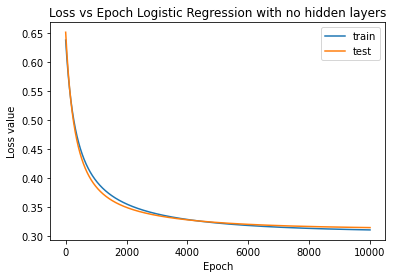

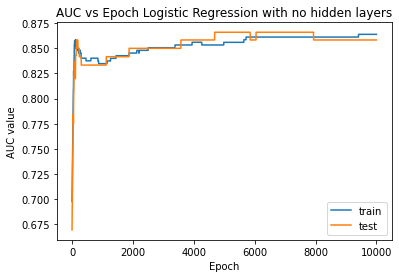

AUC value for test values:  0.858


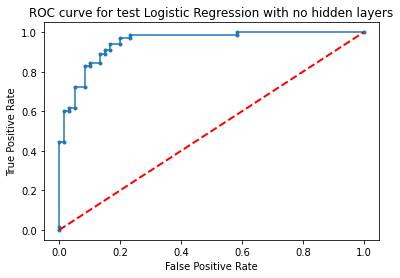

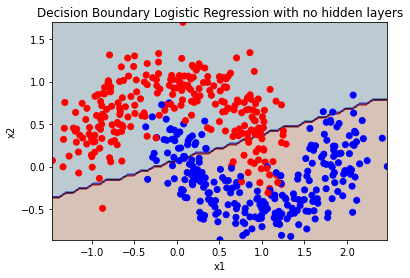

In [ ]:
y_test_predicted =  logistic_regression_model.forward(x_test).round().detach().numpy().reshape(-1,)
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test , y_test_predicted , pos_label=1)
auc_value_test = metrics.auc(fpr_test, tpr_test)

print_classification_multi_class_report(y_test, y_test_predicted)

#print plots
plot_loss_by_epoch (num_epochs = 10000 , loss_train_list = loss_train_values_list, loss_test_list = loss_test_values_list, model_name= "Logistic Regression with no hidden layers")
plot_auc_by_epoch(num_epochs =10000, auc_values_train = auc_values_train , auc_values_test =  auc_values_test,  model_name= "Logistic Regression with no hidden layers"  )
roc_plot(y_test, y_pred_test_numpy,  model_name= "Logistic Regression with no hidden layers")
plot_decision_boundary(x ,y, logistic_regression_model, model_name= "Logistic Regression with no hidden layers" )

##  Briefly interpret graph's results

**LOSS vs EPOCH**


We can see that during the epoch the loss value is decreasing,  both in the train data set and the test data set, as we expected. 
We  stopped after 10,000 epoches when the loss converged.


**AUC vs EPOCH**


At the beginning the AUC is high and gradually improves with some non improvements during the training until it eventually converges so that the training AUC is slightly better than the testing AUC, as expected.


**ROC curve**


ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.The area under the curve is the AUC that we showed in the previous plot.

**Decision Boundary**

All the observation that their y predicted is above the threshold (0.5) will be classified as 1, otherwise, it will classified as 0.

**Question:** 

Is the decision boundary linear or nonlinear in the case of a logistic regression? Explain.

Because our features are first order, the decision bounday is linear - above it it will predcit - 1, else 0.

# Classification with Neural Networks

After you implemented "classical" logistic regression, now you will be implementing a neural network with one or more hidden layers.
You will need to choose the number of hidden layers and nodes in a feedforward neural network, activation function, the type of optimizer and its hyperparmeters which will give you the best result. Remember, we don't want to overfit the training data, we want to generalize the solution for new data not seen during training. 

Plot the same graphs as in the previous sections and explain the similarities and differences. 

**Define the Model:**

In [ ]:
### START CODE HERE ###
class Model_two_layers(torch.nn.Module):
   def __init__(self):
      super(Model_two_layers,self).__init__()
      self.fc1 = torch.nn.Linear(2,5) 
      self.fc2 =  torch.nn.Linear(5,2) 
      self.fc3 =  torch.nn.Linear(2,1)
   def forward (self,x):
     x = F.relu(self.fc1(x))
     x = self.fc2(x)
     y_pred = torch.sigmoid (self.fc3(x))  
     return y_pred  

# our model
logistic_regression_two_layers_model = Model_two_layers()
criterion = torch.nn.BCELoss(size_average= True)
optimizer = torch.optim.SGD (logistic_regression_two_layers_model.parameters(), lr = 0.01) 




# our model
logistic_regression_two_layers_model = Model_two_layers()
criterion = torch.nn.BCELoss(size_average= True)
optimizer = torch.optim.SGD (logistic_regression_two_layers_model.parameters(), lr = 0.01)



/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


**Training and validation:**

In [ ]:
### START CODE HERE ###
loss_two_layers_values = []
loss_test_two_layers_values_list = []
auc_values_two_layers_train = []
auc_values_two_layers_test = []
num_epochs = 15000

print("Training logistic regression with hiden layers:")

for epoch in range (num_epochs):
   y_pred_two_layers = logistic_regression_two_layers_model.forward(x_train)

   loss = criterion (y_pred_two_layers, y_train_tensor)  
   loss_two_layers_value =  loss.data.item()
   if epoch % 1000 == 0:
    print ("epoch number: ", epoch, "cost function value: ", round( loss_two_layers_value, 5))
   
   # loss by epoch train
   loss_two_layers_values.append( loss_two_layers_value)
   
   # auc by epoch train
   y_pred_numpy_two_layers = y_pred_two_layers.round().detach().numpy().reshape(-1,)
   fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_numpy_two_layers , pos_label=1)
   auc_value_two_layers = metrics.auc(fpr, tpr)
   auc_values_two_layers_train.append( auc_value_two_layers)

   # calcuale test
   y_pred_test_two_layers =  logistic_regression_two_layers_model.forward(x_test)
   loss_test_two_layers   =  criterion (y_pred_test_two_layers, y_test_tensor)
   loss_test_value_two_layers = loss_test_two_layers.data.item()
   loss_test_two_layers_values_list.append(loss_test_value_two_layers)

  # auc by epoch test
   y_test_predicted_two_layers =  logistic_regression_two_layers_model.forward(x_test).detach().numpy().reshape(-1,)
   y_test_predicted_two_layers_rounded =   y_test_predicted_two_layers.round()
   fpr_test_two_layers, tpr_test, thresholds = metrics.roc_curve(y_test ,y_test_predicted_two_layers_rounded , pos_label=1)
   auc_value_test = metrics.auc(fpr_test_two_layers, tpr_test)
   auc_values_two_layers_test.append(auc_value_test)

   optimizer.zero_grad() 
   loss.backward()
   optimizer.step()

Training logistic regression with hiden layers:
epoch number:  0 cost function value:  0.7792
epoch number:  1000 cost function value:  0.39051
epoch number:  2000 cost function value:  0.3104
epoch number:  3000 cost function value:  0.30338
epoch number:  4000 cost function value:  0.29781
epoch number:  5000 cost function value:  0.29336
epoch number:  6000 cost function value:  0.28939
epoch number:  7000 cost function value:  0.28565
epoch number:  8000 cost function value:  0.28261
epoch number:  9000 cost function value:  0.28029
epoch number:  10000 cost function value:  0.27836
epoch number:  11000 cost function value:  0.27707
epoch number:  12000 cost function value:  0.27609
epoch number:  13000 cost function value:  0.27539
epoch number:  14000 cost function value:  0.27484


**Visualizing the plots:**

,precision,recall,f1-score,support
0,0.83,0.92,0.87,60.00
1,0.92,0.83,0.87,65.00
accuracy,0.87,0.87,0.87,0.87
macro avg,0.87,0.87,0.87,125.00
weighted avg,0.88,0.87,0.87,125.00


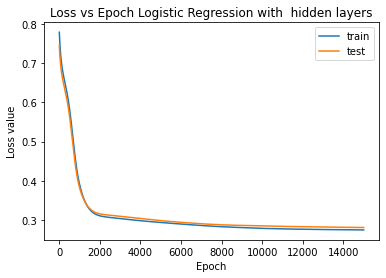

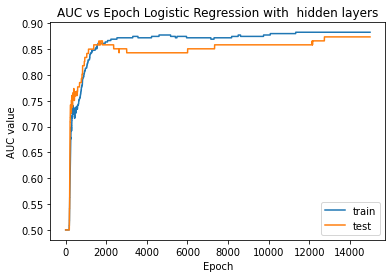

AUC value for test values:  0.874


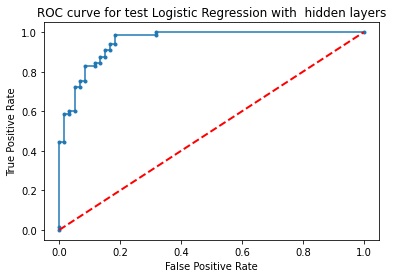

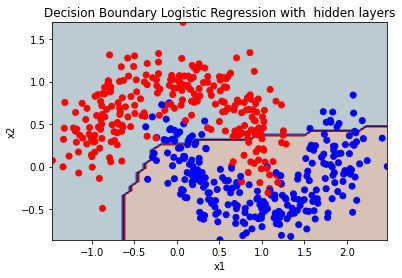

In [ ]:
print_classification_multi_class_report(y_test, y_test_predicted_two_layers_rounded )

#print plots
plot_loss_by_epoch (num_epochs = num_epochs , loss_train_list = loss_two_layers_values, loss_test_list =   loss_test_two_layers_values_list,  model_name= "Logistic Regression with  hidden layers")
plot_auc_by_epoch(num_epochs =  num_epochs , auc_values_train = auc_values_two_layers_train , auc_values_test =  auc_values_two_layers_test,  model_name= "Logistic Regression with  hidden layers"  )
roc_plot(y_test, y_test_predicted_two_layers,  model_name= "Logistic Regression with  hidden layers")
plot_decision_boundary(x,y,logistic_regression_two_layers_model, model_name= "Logistic Regression with  hidden layers")

**The differences between the Logistic regression with no layers and the logistic regression with 1 hidden layer**:


We can see that with addional  hidden layers we converged to better results quicker than the logistic regresson with no hidden layers. 


We can see that the decision boundary in the model with hidden layer is not linear.

# Regression with Neural Networks

In this part of the excercise you will need to implement a regression model using neural networks. The model should predict the output of a trigonometric function of two variables. Your data set is based on a meshgrid. Your task is to create a list of points that would correspond to a grid and use it for the input of your neural network. Then, build your neural networks and find the architecture which gives you the best results.
1. Plot the surface from the overall data and compare it to your predicted test sets.
2. Which loss function and validation metric did you choose?
3. Plot the loss and validation metrics vs epoch for the training and test sets.
4. Build a new neural network and try overfitting your training set. Show that you managed to overfit. Explain.

# Packages 

First import all the packages that you will need during this part of assignment.

Feel free to use another libraries if you want to.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc ,  mean_squared_error
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
from matplotlib import cm
import torch.nn.functional as F
import torch.nn as nn
random_num = 12

**Generate data:**

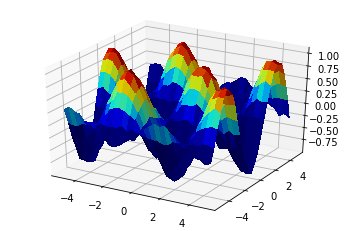

In [ ]:
random_num = 12
np.random.seed(random_num)
x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx) * np.cos(yy) + 0.1 * np.random.rand(xx.shape[0], xx.shape[1])

#prepare data:
x1 = xx.ravel().flatten()
x2 = yy.ravel().flatten()
y_reg = z.ravel().flatten()
x_data = np.column_stack([x1,x2])
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_data, y_reg, test_size=0.25)

x_train_reg_tensor = torch.Tensor(x_train_reg)
x_test_reg_tensor =  torch.Tensor(x_test_reg)
y_train_reg_tensor = torch.Tensor(y_train_reg)
y_test_reg_tensor = torch.Tensor(y_test_reg)

# See the Data in 3D:
ax = plt.axes(projection='3d')
my_col = cm.jet(z/np.amax(z)) # For heat color by Z-axis
surf = ax.plot_surface(xx, yy, z, rstride=1, cstride=1, facecolors = my_col, linewidth=0, antialiased=False)
# plt.rcParams["figure.figsize"] = (20,3)
# ax.set_zlim(-1.01, 1.01)‏‏
plt.show()

**Define the Model:**

In [ ]:
### START CODE HERE ###

class RegressionModel(torch.nn.Module):
   def __init__(self):
      super(RegressionModel,self).__init__()
      self.fc1 =  torch.nn.Linear(2,100) 
      self.fc2 =  torch.nn.Linear(100,50)
      self.fc3 =  torch.nn.Linear(50,20)
      self.fc4 =  torch.nn.Linear(20,1) 

   def forward(self,x):
     x = F.relu(self.fc1(x))
     x = F.relu(self.fc2(x))
     x = F.relu(self.fc3(x))
     y_pred = self.fc4(x)
     return y_pred  


# our model
# torch.manual_seed(123)
regression_model = RegressionModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(regression_model.parameters(), lr = 0.01)

**Training and validation:**

In [ ]:
loss_train_reg_values = []
loss_test_reg_values = []
auc_values_reg_train = []
auc_values_reg_test = []
num_epochs =  6000

print("Training  regression model:")

for epoch in range (num_epochs): 
    # calcuale train 
    y_train_pred_reg = regression_model.forward(x_train_reg_tensor)

    loss = criterion (y_train_pred_reg.flatten(), y_train_reg_tensor)  
    loss_train_reg_values.append(loss.data.item())

    y_pred_train_numpy_reg = y_train_pred_reg.detach().numpy().reshape(-1,)

    # calcuale test
    y_pred_test_reg =  regression_model.forward(x_test_reg_tensor)
    loss_test_reg  =  criterion (y_pred_test_reg.flatten(), y_test_reg_tensor)
    loss_test_reg_values.append(loss_test_reg.data.item())

    y_pred_test_reg_numpy =  y_pred_test_reg.detach().numpy().reshape(-1,)

    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()

    if epoch % 60 == 0:
        print ("epoch number: ", epoch, " | train loss: ", round(loss_train_reg_values[-1], 8), " | test loss: ", round(loss_test_reg_values[-1], 8))


Training  regression model:
epoch number:  0  | train loss:  0.24673918  | test loss:  0.27115676
epoch number:  60  | train loss:  0.07078797  | test loss:  0.07518575
epoch number:  120  | train loss:  0.02418731  | test loss:  0.03334477
epoch number:  180  | train loss:  0.01083275  | test loss:  0.01656442
epoch number:  240  | train loss:  0.00914177  | test loss:  0.01445876
epoch number:  300  | train loss:  0.00470424  | test loss:  0.00839854
epoch number:  360  | train loss:  0.00368477  | test loss:  0.00597598
epoch number:  420  | train loss:  0.00251258  | test loss:  0.00512384
epoch number:  480  | train loss:  0.00252235  | test loss:  0.00434014
epoch number:  540  | train loss:  0.00180471  | test loss:  0.00385467
epoch number:  600  | train loss:  0.00166143  | test loss:  0.00397707
epoch number:  660  | train loss:  0.00151628  | test loss:  0.00376738
epoch number:  720  | train loss:  0.00210357  | test loss:  0.004347
epoch number:  780  | train loss:  0.0013

**Which loss function and validation metric did you choose?**


We chose MSE loss function since it is great for ensuring that our trained model has no outlier predictions with huge errors, as the MSE puts larger weight on theses errors due to the squaring part of the function. Also, negative values are not neutralizing positive values. In addition, it is easy to differentiate and very common in these kind of problems.
In order to compare our performances we observed the loss value of the test set results in each epoch, as we did not use validation set in particular.

**Visualizing the plots:**

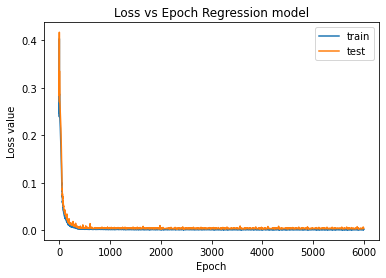

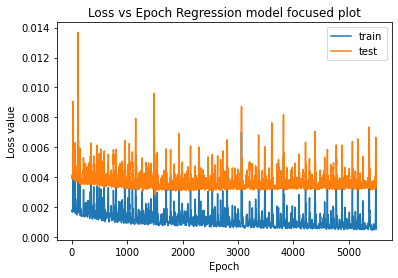

In [ ]:
#print plot
plot_loss_by_epoch (num_epochs = len(loss_test_reg_values) , loss_train_list = loss_train_reg_values , loss_test_list =  loss_test_reg_values ,  model_name= "Regression model")
#print focused plot
foc_loss_train_reg_values = loss_train_reg_values[500:]
foc_loss_test_reg_values = loss_test_reg_values[500:]
plot_loss_by_epoch (num_epochs = len(foc_loss_test_reg_values) , loss_train_list = foc_loss_train_reg_values , loss_test_list =  foc_loss_test_reg_values ,  model_name= "Regression model focused plot")

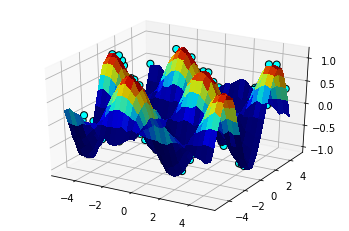

In [ ]:
# See the Data in 3D:
ax = plt.axes(projection='3d')
my_col = cm.jet(z/np.amax(z)) # For heat color by Z-axis
ax.scatter(x_test_reg[:, 0].reshape(15, 15), x_test_reg[:, 1].reshape(15, 15),y_pred_test_reg_numpy.reshape(15, 15), c='aqua',s = 50 , marker='o', alpha=1, edgecolors = 'k')
surf = ax.plot_surface(xx, yy, z, rstride=1, cstride=1, facecolors = my_col, linewidth=0, antialiased=False)
# plt.rcParams["figure.figsize"] = (20,3)
# ax.set_zlim(-1.01, 1.01)‏‏
plt.show()

the light bue dots are the predicted values.

### Build a new neural network and try overfitting your training set

**Generate data:**

In [ ]:
np.random.seed(random_num)
x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx) * np.cos(yy) + 0.1 * np.random.rand(xx.shape[0], xx.shape[1])

#prepare data:
x1 = xx.ravel().flatten()
x2 = yy.ravel().flatten()
y_reg = z.ravel().flatten()
x_data = np.column_stack([x1,x2])
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_data, y_reg, test_size=0.25, random_state=random_num)

x_train_reg_tensor = torch.Tensor(x_train_reg)
x_test_reg_tensor =  torch.Tensor(x_test_reg)
y_train_reg_tensor = torch.Tensor(y_train_reg)
y_test_reg_tensor = torch.Tensor(y_test_reg)

**Define the Model:**

In [ ]:
### START CODE HERE ###

class RegressionModel(nn.Module):
   def __init__(self):
      super(RegressionModel,self).__init__()
      self.fc1 =  torch.nn.Linear(2,100) 
      self.fc2 =  torch.nn.Linear(100,100)
      self.fc3 =  torch.nn.Linear(100,100)
      self.fc4 =  torch.nn.Linear(100,1) 

   def forward(self,x):
     x = F.relu(self.fc1(x))
     x = F.relu(self.fc2(x))
     x = F.relu(self.fc3(x))
     y_pred = self.fc4(x)
     return y_pred  

# our model
# torch.manual_seed(123)
regression_model = RegressionModel()
criterion = torch.nn.MSELoss(size_average= True )
optimizer = torch.optim.Adam(regression_model.parameters())

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


**Training and validation:**

In [ ]:
loss_train_reg_values = []
loss_test_reg_values = []
auc_values_reg_train = []
auc_values_reg_test = []
num_epochs =  600

print("Training regression model:")

for epoch in range (num_epochs):
  e_loss = []
  for i in range(len(x_train_reg_tensor)):
    x_samp, y_samp = x_train_reg_tensor[i], y_train_reg_tensor[i]
    y_train_pred_reg = regression_model.forward(x_samp)

    loss = criterion(y_train_pred_reg, y_samp)  
    
    # loss by epoch train
    loss_train_reg_values.append(loss.data.item())

    y_pred_train_numpy_reg = y_train_pred_reg.detach().numpy().reshape(-1,)

    # calcuale test
    y_pred_test_reg =  regression_model.forward(x_test_reg_tensor)
    loss_test_reg  =  criterion (y_pred_test_reg, y_test_reg_tensor)
    loss_test_value_reg = loss_test_reg.data.item()
    loss_test_reg_values.append(loss_test_value_reg )

    y_pred_test_reg_numpy =  y_pred_test_reg.detach().numpy().reshape(-1,)

    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()
  if epoch % 60 == 0:
    print ("epoch number: ", epoch, "cost function value: ", round(np.mean(loss_train_reg_values[-1]), 8))


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([225])) that is different to the input size (torch.Size([225, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Training regression model:
epoch number:  0 cost function value:  0.00277788
epoch number:  60 cost function value:  0.01771767
epoch number:  120 cost function value:  0.01338556
epoch number:  180 cost function value:  0.02076921
epoch number:  240 cost function value:  0.00689609
epoch number:  300 cost function value:  0.01291586
epoch number:  360 cost function value:  0.01150816
epoch number:  420 cost function value:  0.0127377
epoch number:  480 cost function value:  0.00184745
epoch number:  540 cost function value:  0.00698519


**Visualizing the plots:**

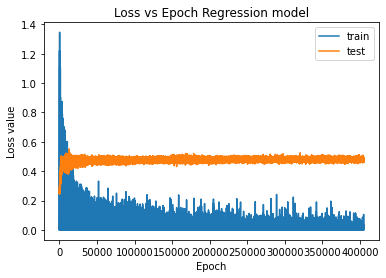

In [ ]:
#print plot
plot_loss_by_epoch (num_epochs = len(loss_test_reg_values) , loss_train_list = loss_train_reg_values , loss_test_list =  loss_test_reg_values ,  model_name= "Regression model")

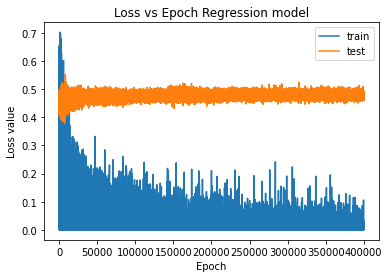

In [ ]:
#print focused plot
foc_loss_train_reg_values = loss_train_reg_values[5000:]
foc_loss_test_reg_values = loss_test_reg_values[5000:]
plot_loss_by_epoch (num_epochs = len(foc_loss_test_reg_values) , loss_train_list = foc_loss_train_reg_values , loss_test_list =  foc_loss_test_reg_values ,  model_name= "Regression model")

5. Briefly explain graph's results.

Type your answer here:


We can see that the in the training data set the loss function is decreasing in each epoch. In the test set, the loss function is also decreasing, but there is a point where the value starts to increase. The reason for that is because our model is overfitted. 


6. How does your metric value differs between the training data and the test data and why?


Type your answer here:


The loss function is decreasing in each epoch. In the test set, the loss function is decreasing, but there is a point where the value starts to increase since the model is overfitted. Think of it as instead of having a straight line that predicts a trend we have line that is closer to each point in our data. Therefore, every real-life data that we add as input to this model, will be less and less predicted by a real-life model. Instead, it will be predicted by a model that is suited for the data it was trained by.

